# Лабораторная работа №1 
# 6132 Курицын Никита

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

1. Считать цветное rgb изображение

In [2]:
ORIGINAL_image = cv2.imread("ph_1.jpg") #загрузка оригинального изображения

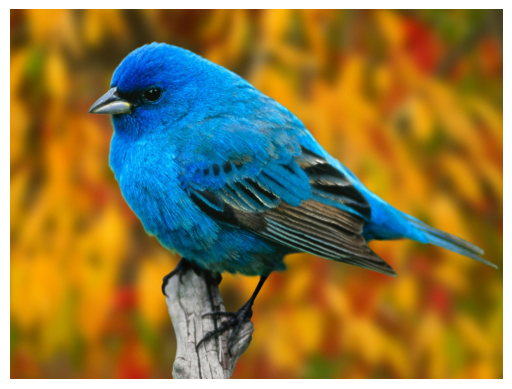

In [3]:
RGB_image = cv2.cvtColor(ORIGINAL_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)
plt.axis('off')
plt.show()

In [4]:
def display_images(image: np.ndarray,names_image): # функция для вывода изображения и гистограммы
    fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))

    axes_1[0].imshow(image, cmap='gray')
    axes_1[0].set_title(names_image)
    axes_1[0].axis('off')
    
    axes_1[1].hist(image.flatten(), bins=256, color='blue', alpha=0.7)
    axes_1[1].set_title('Гисторграмма')
    axes_1[1].set_xlabel('Значение яркости')
    axes_1[1].set_ylabel('Частота')

    plt.show()

2. Преобразовать изображение в градации серого

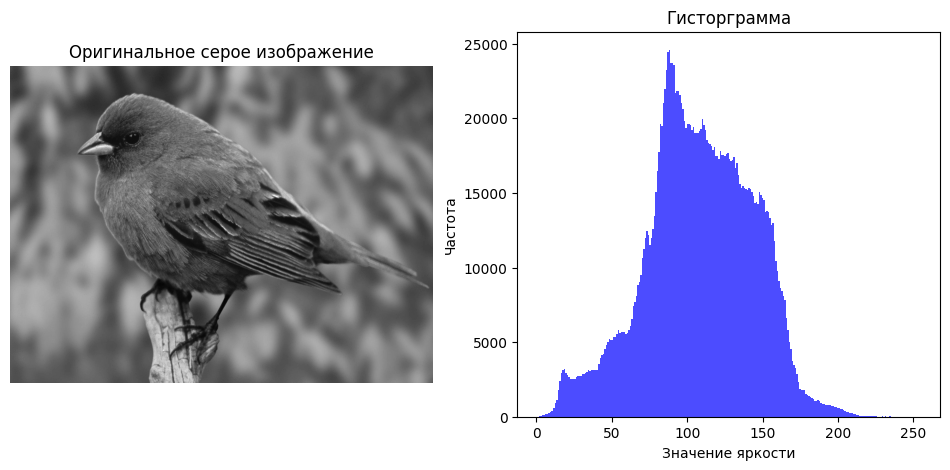

In [5]:
GRAY_image = cv2.imread("ph_1.jpg", cv2.IMREAD_GRAYSCALE)
display_images(GRAY_image,"Оригинальное серое изображение")

4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением

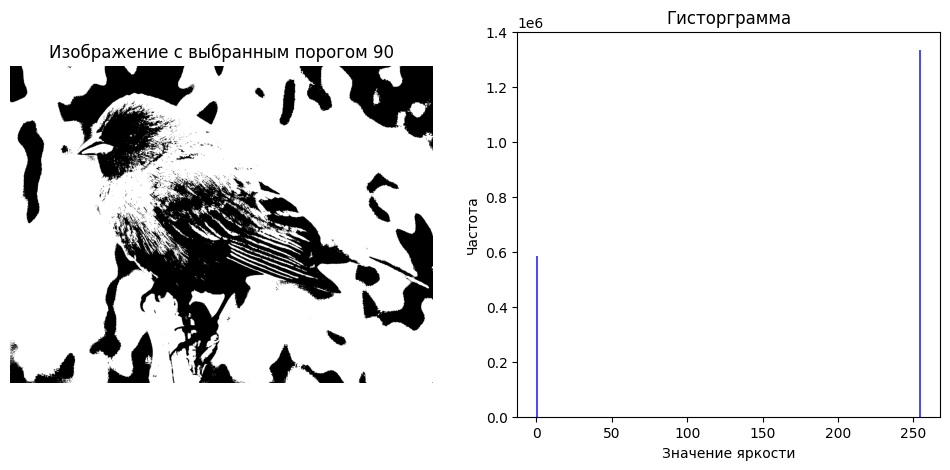

In [6]:
thre = 90
THRESHOLD_image = np.where(GRAY_image < thre, 0 , 255)
display_images(THRESHOLD_image,f"Изображение с выбранным порогом {thre}")

5. Сделать пороговую обработку методом Otsu (Функция OpenCV)

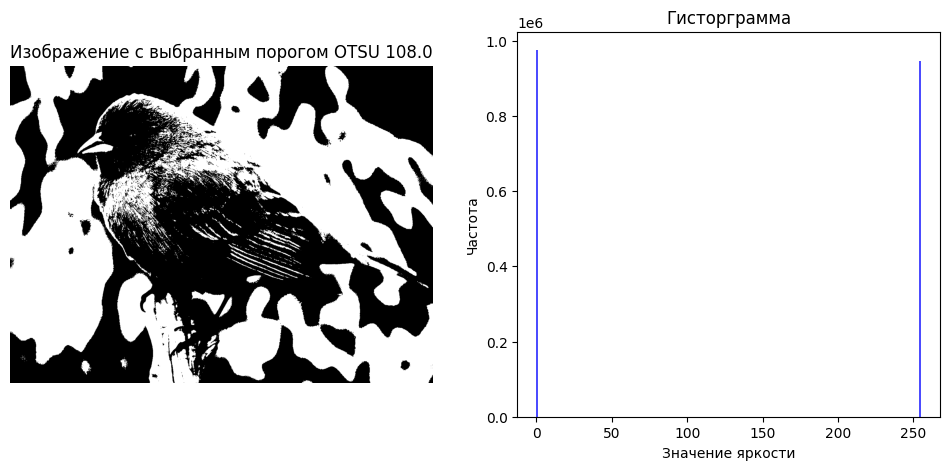

In [7]:
OTSU_threshold ,OTSU_image = cv2.threshold(GRAY_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
display_images(OTSU_image,f"Изображение с выбранным порогом OTSU {OTSU_threshold}")

3. Написать функцию реализации поэлементной обработки изображения
6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей

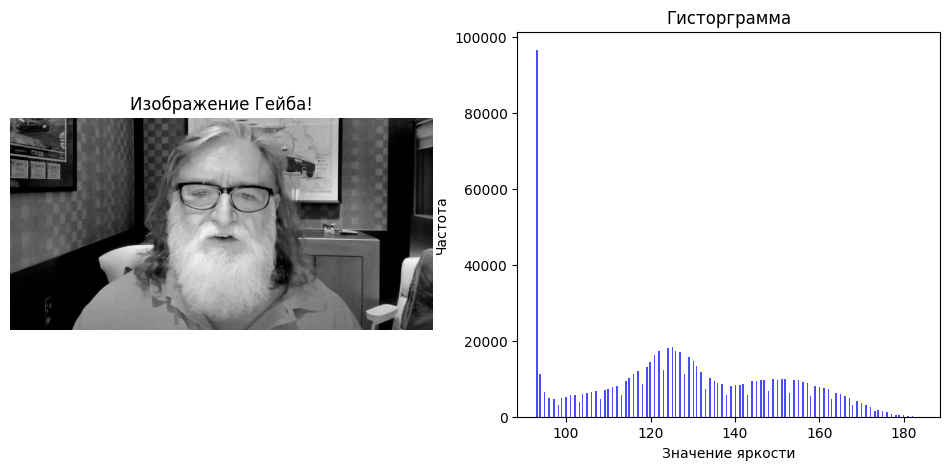

In [8]:
GABE_image = cv2.imread("ph_2.png",cv2.IMREAD_GRAYSCALE)
display_images(GABE_image,"Изображение Гейба!")

In [9]:
def my_fun(a,b,x):
    return a*x+b

In [10]:
def process_image(image: np.ndarray, fun):
    print("Будем обрабатывать!")
    
    proc_image = np.copy(image)
    min_val, max_val, _, _ = cv2.minMaxLoc(image)
    
    print(f"Минимальное значение функции яркости: {min_val}")
    print(f"Максимальное значение функции яркости: {max_val}")
    
    a = (255 - 0)/(max_val - min_val)
    b = (0*max_val - 255*min_val)/((max_val - min_val))

    print(f"a =  {a}")
    print(f"b = {b}")
    
    for i in range(proc_image.shape[0]):
        for j in range(proc_image.shape[1]):
            proc_image[i,j]= fun(a,b,proc_image[i,j])
    return proc_image

Будем обрабатывать!
Минимальное значение функции яркости: 93.0
Максимальное значение функции яркости: 184.0
a =  2.802197802197802
b = -260.6043956043956


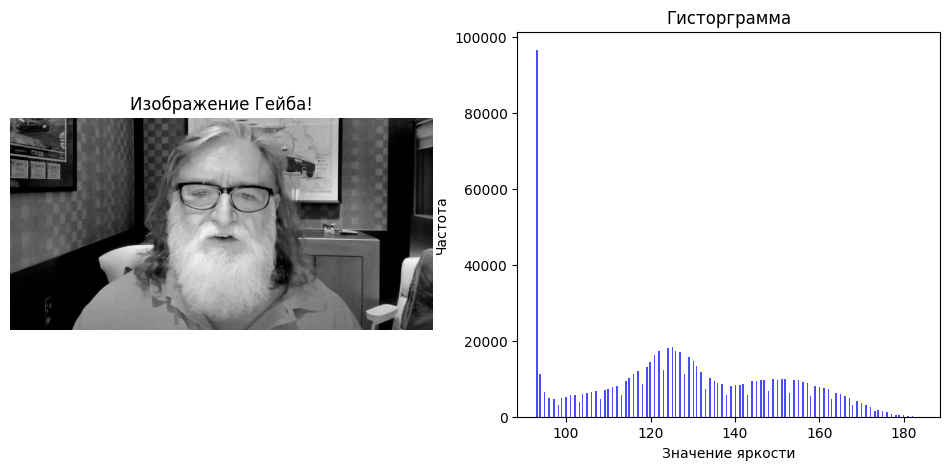

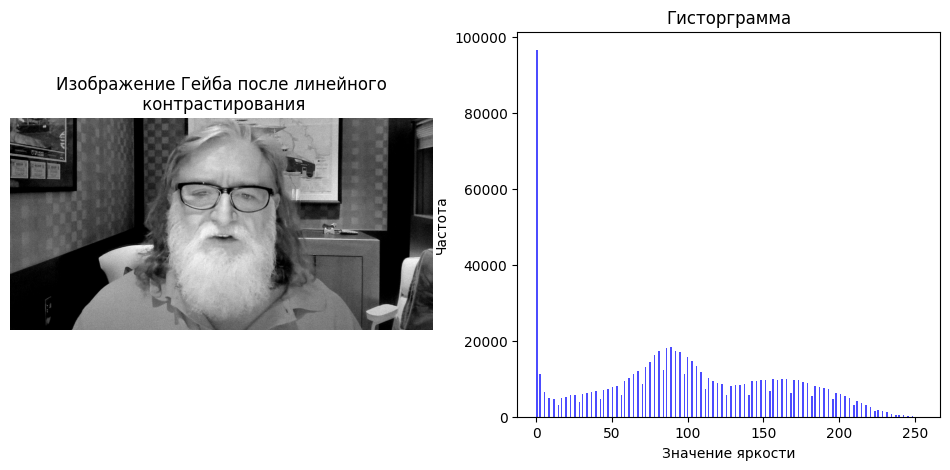

In [13]:
new_GABE_image = process_image(GABE_image,my_fun)
display_images(GABE_image,"Изображение Гейба!")
display_images(new_GABE_image, "Изображение Гейба после линейного\n контрастирования")

In [14]:
def display_images_2(image: np.ndarray,names_image):
    fig_1, axes_1 = plt.subplots(1, 3, figsize=(20, 6))

    axes_1[0].imshow(image, cmap='gray')
    axes_1[0].set_title(names_image)
    axes_1[0].axis('off')
    
    axes_1[1].hist(image.flatten(), bins=256, color='blue', alpha=0.7)
    axes_1[1].set_title('Гисторграмма')
    axes_1[1].set_xlabel('Значение яркости')
    axes_1[1].set_ylabel('Частота')

    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    s = hist.cumsum()
    axes_1[2].plot(s, color='gray')
    axes_1[2].set_title('Интергральная функция')
    axes_1[2].set_xlabel('Значение яркости')
    axes_1[2].set_ylabel('Значение')
    
    plt.show()

7. Сделать эквализацию гистограммы изображения

In [15]:
def histogram_equalization(image: np.ndarray):
    proc_image = np.copy(image)
    
    hist, _ = np.histogram(proc_image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    # print(hist)
    # print(cdf)
    # print(len(cdf_normalized))

    for i in range(proc_image.shape[0]):
        for j in range(proc_image.shape[1]):
            proc_image[i,j] = 255 * cdf_normalized[proc_image[i, j]]
    return proc_image

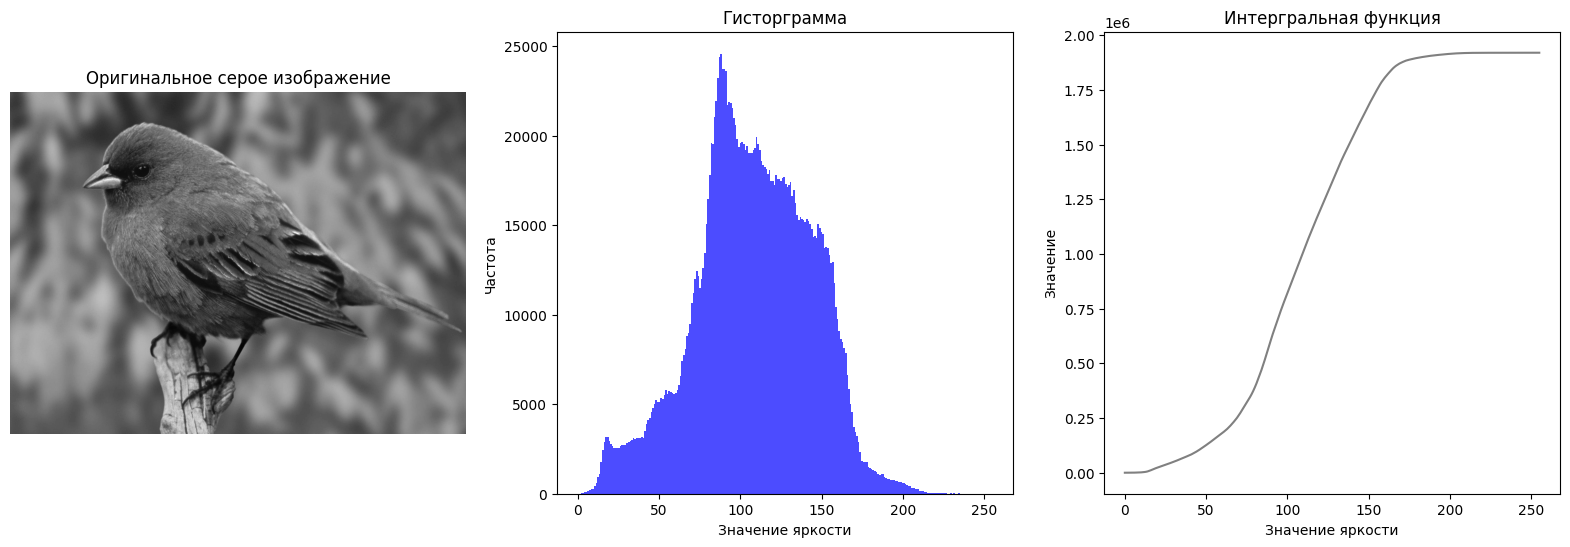

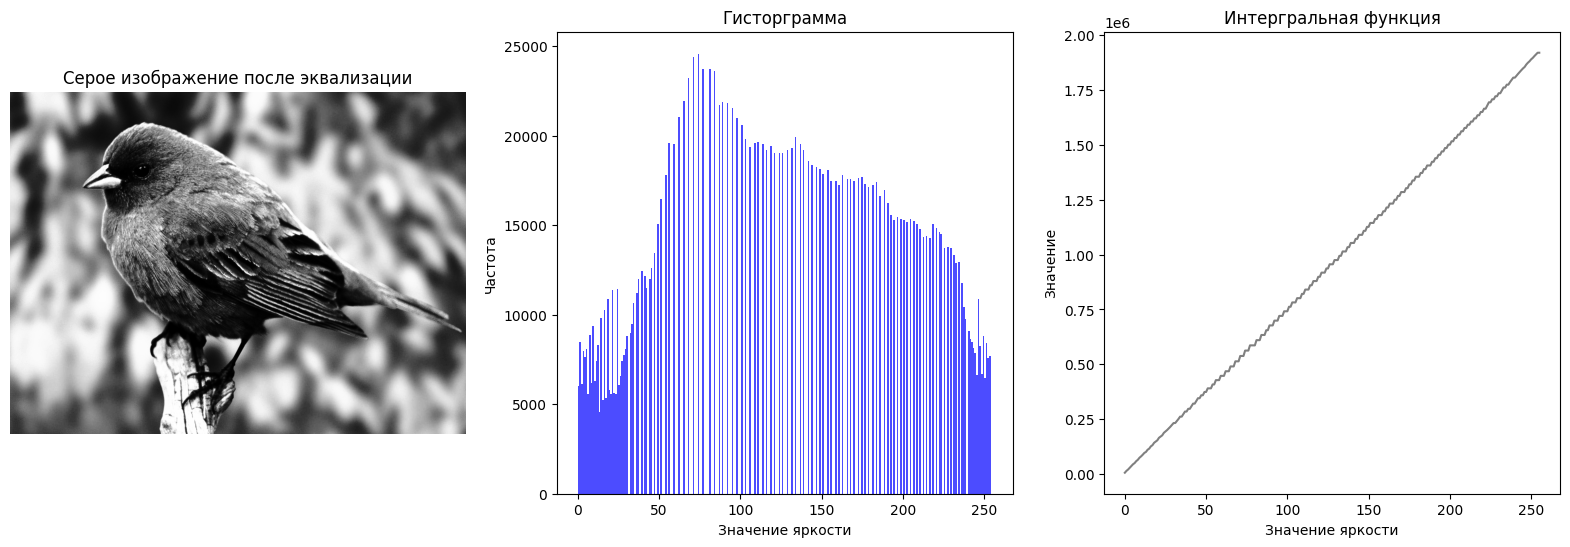

In [16]:
equalized_image = histogram_equalization(GRAY_image)
display_images_2(GRAY_image,"Оригинальное серое изображение")
display_images_2(equalized_image, "Серое изображение после эквализации")

8. Сделать эквализацию методом CLAHE (Функция OpenCV)

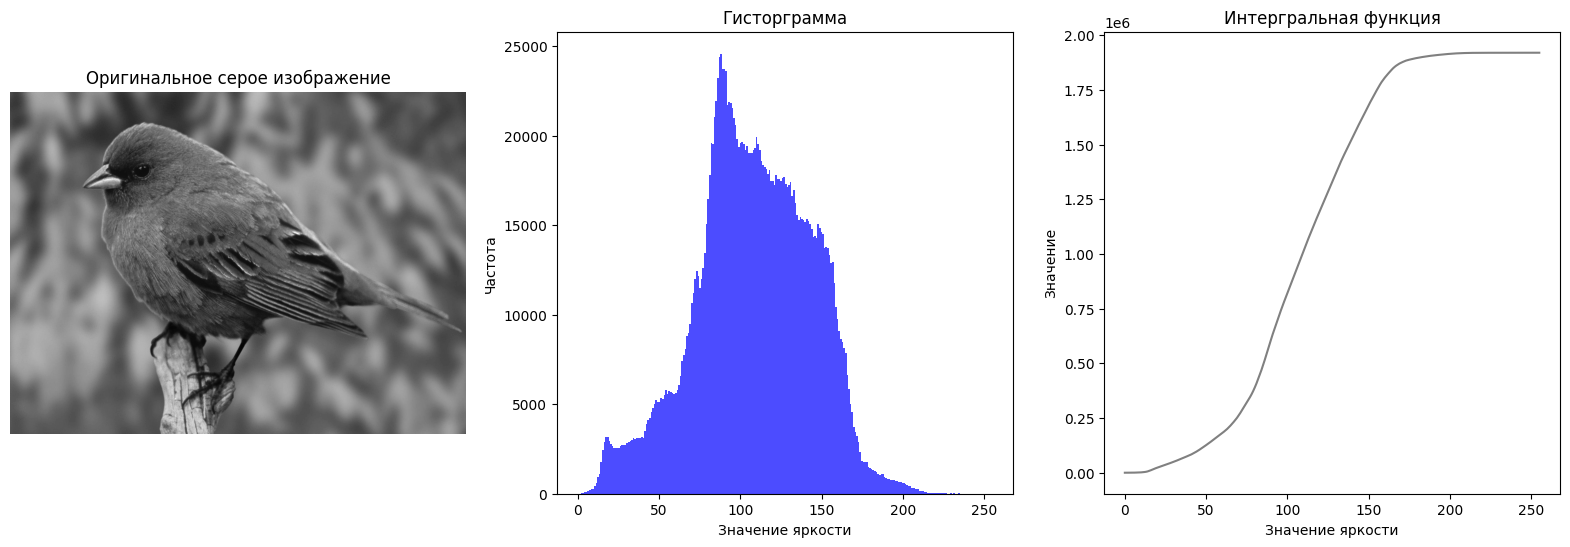

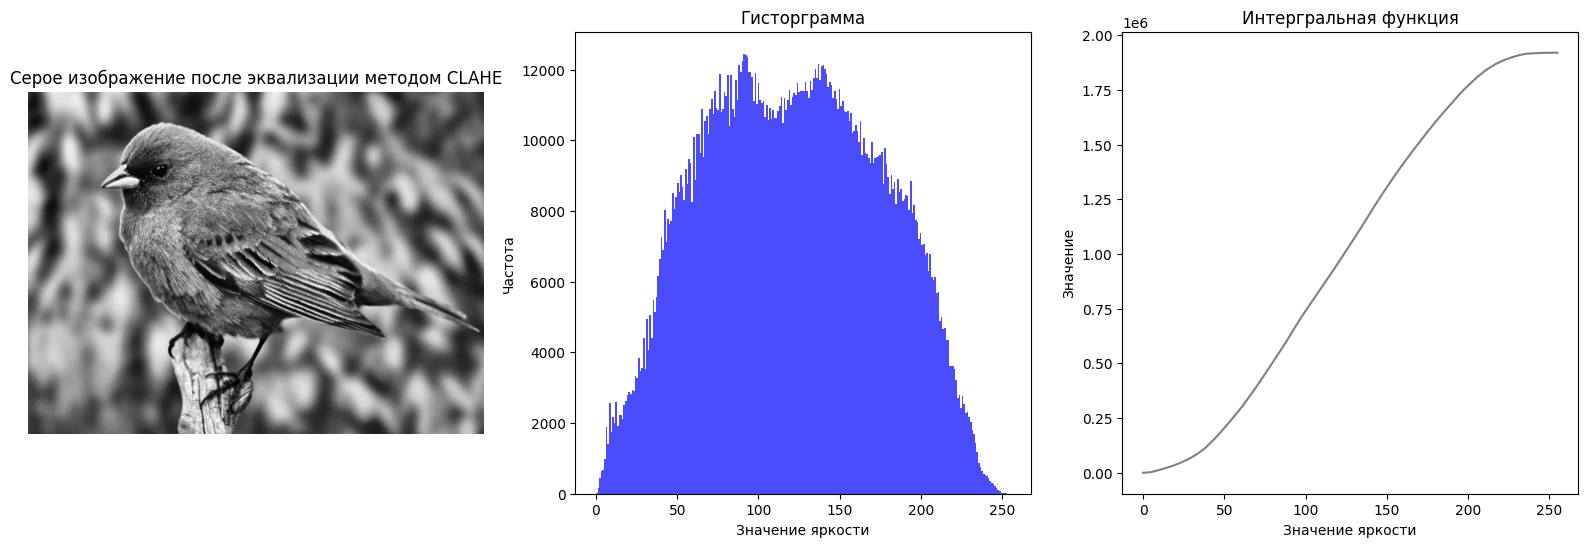

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
CLAHE_equalized_image = clahe.apply(GRAY_image)
display_images_2(GRAY_image,"Оригинальное серое изображение")
display_images_2(CLAHE_equalized_image,"Серое изображение после эквализации методом CLAHE" )

9. Осуществить препарирование изображения с заданной препарирующей функцией

In [18]:
def my_prepare_fun(x, min_val = 50,max_val = 205):
    if x < min_val or x >= max_val:
        return 0
    else:
        return 255 *( x - min_val)  / (max_val - min_val)
        # return (255*x)/(max_val - min_val)

In [19]:
def prepare_image(image, prepare_function):
    proc_image = np.copy(image)

    for i in range(proc_image.shape[0]):
        for j in range(proc_image.shape[1]):
                proc_image[i,j] = prepare_function(proc_image[i,j])

    return proc_image

In [ ]:
PREPARE_GRAY_image = prepare_image(GRAY_image,my_prepare_fun )
display_images(GRAY_image,"Оригинальное серое изображение")
display_images(PREPARE_GRAY_image,"Препарированное изображение с функцией 6")

In [ ]:
plt.plot([my_prepare_fun(x) for x in range(256)])
plt.set_title('Функция')
plt.grid()